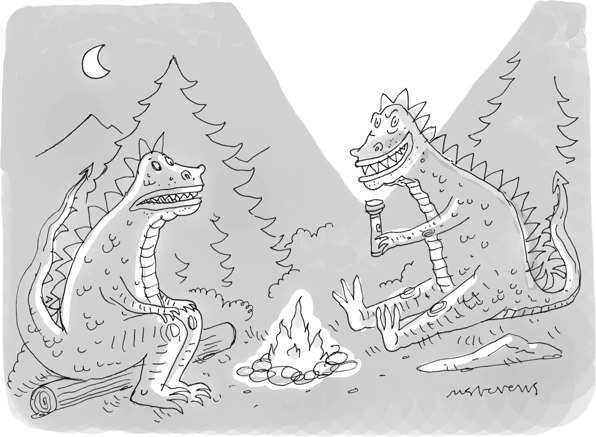

In [13]:
import requests
from PIL import Image

url = 'https://media.newyorker.com/cartoons/63dc6847be24a6a76d90eb99/master/w_1160,c_limit/230213_a26611_838.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')  
display(image.resize((596, 437)))

In [14]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Loading checkpoint shards: 100%|██████████| 2/2 [00:10<00:00,  5.00s/it]


two cartoon monsters sitting around a campfire


In [15]:
import os

# Get the folder path
folder_path = "C:/Users/013/Desktop/ml_image_server/project_team_6"

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Rename files with new pattern
for i, old_name in enumerate(image_files):
    # Construct new filename
    file_extension = os.path.splitext(old_name)[1]
    new_name = f"play_images{i}{file_extension}"
    
    # Create full file paths
    old_path = os.path.join(folder_path, old_name)
    new_path = os.path.join(folder_path, new_name)
    
    # Rename the file
    os.rename(old_path, new_path)
    print(f"Renamed {old_name} to {new_name}")


Renamed 12461ebfd3210bcada8183e774144890.jpg to play_images0.jpg
Renamed daba154a5f1103036416628c66b5527d.jpg to play_images1.jpg
Renamed f89ba8686e9af2663608afa762f6f8f0.jpg to play_images2.jpg
Renamed play_multiculture_images-1.jpg to play_images3.jpg
Renamed play_multiculture_images-2.jpg to play_images4.jpg
Renamed play_multiculture_images-3.jpg to play_images5.jpg
Renamed play_multiculture_images-4.jpg to play_images6.jpg
Renamed play_multiculture_images-5.jpg to play_images7.jpg
Renamed play_multiculture_images-6.jpg to play_images8.jpg
Renamed play_multiculture_images-7.jpg to play_images9.jpg
Renamed play_multiculture_images-8.jpg to play_images10.jpg
Renamed play_multiculture_images.jpg to play_images11.jpg


In [16]:

# Get the folder path
folder_path = "C:/Users/013/Desktop/ml_image_server/project_team_6"

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Process each image and save descriptions to individual text files
for image_file in image_files:
    # Load and process image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    
    # Generate description
    inputs = processor(image, return_tensors="pt").to(device, torch.float16)
    generated_ids = model.generate(**inputs, max_new_tokens=20)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    
    # Create text file with same name as image
    text_filename = os.path.splitext(image_file)[0] + '.txt'
    text_path = os.path.join(folder_path, text_filename)
    
    # Save description to text file
    with open(text_path, 'w') as f:
        f.write(generated_text)
    
    # Print progress
    print(f"Processed {image_file} -> {text_filename}")

Processed play_images0.jpg -> play_images0.txt
Processed play_images1.jpg -> play_images1.txt
Processed play_images10.jpg -> play_images10.txt
Processed play_images11.jpg -> play_images11.txt
Processed play_images2.jpg -> play_images2.txt
Processed play_images3.jpg -> play_images3.txt
Processed play_images4.jpg -> play_images4.txt
Processed play_images5.jpg -> play_images5.txt
Processed play_images6.jpg -> play_images6.txt
Processed play_images7.jpg -> play_images7.txt
Processed play_images8.jpg -> play_images8.txt
Processed play_images9.jpg -> play_images9.txt
